<div style="padding:10px;background-color: #FF4D4D; color:white;font-size:28px;"><strong>Pandas</strong></div>

Como comentamos anteriormente, **NumPy** es la biblioteca fundamental que se encuentra en la base del ecosistema **PyData**. 

Es perfecta cuando estás desarrollando un nuevo modelo estadístico y quieres implementarlo, o cuando necesitas realizar muchas operaciones de álgebra lineal. 

Pero cuando tenemos un conjunto de datos tabular con una variedad de variables, sería complicado usar **NumPy** para preparar, explorar o analizar los datos. Simplemente de muy bajo nivel.

Afortunadamente, para tareas como esas, tenemos [**Pandas**](http://pandas.pydata.org/), la biblioteca de análisis de datos de Python.

Pandas es una biblioteca de código abierto, con licencia BSD (Berkeley Software Distribution), que ofrece estructuras de datos y herramientas de análisis de alto rendimiento y fácil uso para el lenguaje de programación Python.

Pandas es, posiblemente, la biblioteca más importante que debemos conocer de Python para hacer análisis y ciencia de datos. 

Normalmente importamos `pandas` asignándole el nombre `pd`:

In [4]:
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)

# Establecer una semilla para el número aleatorio
np.random.seed(200)

1.26.4
2.2.3


Comencemos con una rápida introducción a los dos tipos principales en Pandas: la **Series** y el **DataFrame**.

## <a style="padding:3px;color: #FF4D4D; "><strong>Series</strong></a>

Una Serie es la forma en que almacenamos una sola variable en **Pandas**. En realidad, es un contenedor (o envoltura) para un arreglo de NumPy.

In [8]:
pd.Series

pandas.core.series.Series

Vamos a crear una Series y a examinar sus componentes

In [10]:
califs = pd.Series([76, 92, 85, 78, 94], name = 'semestral')
califs

0    76
1    92
2    85
3    78
4    94
Name: semestral, dtype: int64

Primero, a la derecha tenemos los datos. De hecho, están almacenados como un *arreglo* de NumPy. Puedes extraerlos de la Series usando el atributo `values`.

In [12]:
califs.values

array([76, 92, 85, 78, 94], dtype=int64)

Como una Series está basada en un arreglo de NumPy, podemos usarla de misma manera en que usarías un arreglo de NumPy.

In [14]:
califs = califs + 1
califs

0    77
1    93
2    86
3    79
4    95
Name: semestral, dtype: int64

In [15]:
califs > 90

0    False
1     True
2    False
3    False
4     True
Name: semestral, dtype: bool

Volvamos a observar las diferentes partes de una Series. 

En la parte inferior de la salida impresa, podemos ver que le hemos dado un nombre. Aunque es opcional, es recomendable para mantener una estructura organizada.

Finalmente, a la izquierda de los datos en el objeto Series, están los números 0, 1 y 2. Esto es algo llamado un **Índice** y es una secuencia de etiquetas para los datos.

Este es un nuevo tipo de objeto en Python que no habíamos visto antes que también está basado en un arreglo de NumPy. Para acceder a él usaremos el atributo `index`.

In [17]:
califs.index

RangeIndex(start=0, stop=5, step=1)

In [18]:
califs[0]

77

De forma predeterminada, cuando creas una nueva Series, obtienes un índice que contiene los enteros 0, 1, 2, y así sucesivamente. Pero puedes cambiarlo por un índice diferente, y no tiene que ser numérico. 

De hecho, a menudo es útil tener etiquetas en forma de cadenas de texto para cada fila.

In [20]:
califs.index = pd.Index(["Mario", "Alejandro", "Javier", "Luciana", "Sabrina"], name = 'estudiante')
califs

estudiante
Mario        77
Alejandro    93
Javier       86
Luciana      79
Sabrina      95
Name: semestral, dtype: int64

Nota que, al igual que con una Series, podemos darle un nombre a un Index, aunque no es obligatorio.

Ahora que tenemos un índice con cadenas de texto, podemos usar esas nuevas etiquetas para seleccionar valores.

In [22]:
califs["Sabrina"]

95

También podemos asignar valores de este modo

In [24]:
califs["Javier"] = 88
califs

estudiante
Mario        77
Alejandro    93
Javier       88
Luciana      79
Sabrina      95
Name: semestral, dtype: int64

Si pasamos una secuencia, podemos acceder a múltiples valores.

In [26]:
califs[["Mario","Luciana"]]

estudiante
Mario      77
Luciana    79
Name: semestral, dtype: int64

También podemos usar selección booleana, al igual que en NumPy.

In [28]:
califs[califs>80]

estudiante
Alejandro    93
Javier       88
Sabrina      95
Name: semestral, dtype: int64

Es importante notar que, no importa cómo manipulemos los datos, las etiquetas del índice siempre permanecen asociadas a sus correspondientes valores. 

El Índice funciona como una forma de hacer un seguimiento de lo que significa cada valor, incluso cuando los datos se reorganizan o cambia la cantidad de valores. A veces esto puede ser realmente importante.

## <a style="padding:3px;color: #FF4D4D; "><strong>DataFrame</strong></a>

Un **DataFrame** es lo que obtenemos al combinar varias Series una al lado de la otra. 

Es una **tabla** rectangular de datos y cada columna podría tener un tipo de dato diferente.

In [32]:
pd.DataFrame

pandas.core.frame.DataFrame

In [33]:
np.random.randint(75,99,5)

array([84, 91, 79, 85, 98])

In [34]:
calif1 = pd.Series([76, 92, 85, 78, 94, 83])
calif2 = pd.Series([84, 89, 86, 82, 95, 83])

# Estableciendo índices
calif1.index = pd.Index(["Mario", "Alejandro", "Javier", "Luciana", "Sabrina", "Beatriz"], name = 'estudiante')
calif2.index = calif1.index

Un Índice es inmutable, por lo que es seguro tener dos Series que compartan un Índice.

In [36]:
calif1, calif2

(estudiante
 Mario        76
 Alejandro    92
 Javier       85
 Luciana      78
 Sabrina      94
 Beatriz      83
 dtype: int64,
 estudiante
 Mario        84
 Alejandro    89
 Javier       86
 Luciana      82
 Sabrina      95
 Beatriz      83
 dtype: int64)

Podríamos pasar estas Series directamente al constructor `DataFrame` para crear un DataFrame.

In [38]:
boleta = pd.DataFrame([calif1, calif2])
boleta

estudiante,Mario,Alejandro,Javier,Luciana,Sabrina,Beatriz
0,76,92,85,78,94,83
1,84,89,86,82,95,83


Si pasamos una lista de Series, estas se convierten en las filas, lo cual no es el comportamiento deseado. Podemos corregir esto transponiendo el DataFrame, tal como lo haríamos con un arreglo de NumPy.

In [40]:
boleta = boleta.T
boleta

,0,1
estudiante,,
Mario,76,84
Alejandro,92,89
Javier,85,86
Luciana,78,82
Sabrina,94,95
Beatriz,83,83


Si le damos un nombre a los objetos Series, esos se convertirán en los nombres de las columnas del DataFrame. Como no lo hicimos anteriormente, ahora podemos establecer manualmente los nombres de las columnas.

In [42]:
boleta.columns = ['semestral','final']
boleta

,semestral,final
estudiante,,
Mario,76,84
Alejandro,92,89
Javier,85,86
Luciana,78,82
Sabrina,94,95
Beatriz,83,83


Una forma mucho más conveniente de crear un DataFrame es pasar un diccionario. Esto también te da una forma fácil de establecer los nombres de las columnas.

In [44]:
boleta = pd.DataFrame({'semestral': calif1, 'final': calif2})
boleta

,semestral,final
estudiante,,
Mario,76,84
Alejandro,92,89
Javier,85,86
Luciana,78,82
Sabrina,94,95
Beatriz,83,83


Si el comando anterior coloca las columnas en el orden incorrecto, podemos corregirlo con el argumento `columns`.

In [46]:
boleta = pd.DataFrame({'semestral': calif1, 'final': calif2}, columns = ['semestral','final'])
boleta

,semestral,final
estudiante,,
Mario,76,84
Alejandro,92,89
Javier,85,86
Luciana,78,82
Sabrina,94,95
Beatriz,83,83


En este caso, nuestro DataFrame es lo suficientemente pequeño como para verlo todo fácilmente. 

Sin embargo, muchas veces necesitaremos trabajar con DataFrames realmente grandes, y habrá que visualizar al menos algunas filas para ver qué contienen. Puedes hacer esto con el método `head()`.

In [48]:
boleta.head()

,semestral,final
estudiante,,
Mario,76,84
Alejandro,92,89
Javier,85,86
Luciana,78,82
Sabrina,94,95


In [49]:
boleta.head(3)

,semestral,final
estudiante,,
Mario,76,84
Alejandro,92,89
Javier,85,86


Si necesitas trabajar con una columna individual, puedes extraerla utilizando la *notación de diccionario*:

In [51]:
boleta['semestral']

estudiante
Mario        76
Alejandro    92
Javier       85
Luciana      78
Sabrina      94
Beatriz      83
Name: semestral, dtype: int64

En este caso, como no hay espacios ni otros caracteres especiales en el nombre de la columna, también podemos acceder a ella como un atributo.

In [53]:
boleta.semestral

estudiante
Mario        76
Alejandro    92
Javier       85
Luciana      78
Sabrina      94
Beatriz      83
Name: semestral, dtype: int64

Debido a que la notación de atributo es muy conveniente al procesar DataFrames, vale la pena seleccionar nombres que no tengan espacios utilizando los estándares ya mencionados (`camelCase` o `snake_case`).

Podemos cambiar las columnas mediante asignación, por ejemplo, si damos un punto adicional a todos en el examen final.

In [57]:
boleta.final = boleta.final + 1
boleta

,semestral,final
estudiante,,
Mario,76,85
Alejandro,92,90
Javier,85,87
Luciana,78,83
Sabrina,94,96
Beatriz,83,84


También podemos usar la asignación estilo diccionario para crear nuevas columnas. (Esto no funciona con la notación de atributo.)

In [59]:
boleta['tarea'] = [90] * 6
boleta

,semestral,final,tarea
estudiante,,,
Mario,76,85,90
Alejandro,92,90,90
Javier,85,87,90
Luciana,78,83,90
Sabrina,94,96,90
Beatriz,83,84,90


Para eliminar una columna, una forma de hacerlo es con el comando `del`.

In [61]:
del boleta['tarea']
boleta

,semestral,final
estudiante,,
Mario,76,85
Alejandro,92,90
Javier,85,87
Luciana,78,83
Sabrina,94,96
Beatriz,83,84


Aunque una mejor forma sería usar el método drop, que funciona tanto con filas como con columnas. Tienes que decirle a Pandas si te refieres a una fila o una columna utilizando el argumento `axis`.

`axis 0` se refiere a la dirección hacia abajo, es decir, operaciones que cambian el número de filas. 

`axis 1` se refiere a la dirección horizontal, es decir, operaciones que cambian el número de columnas.

Si queremos eliminar las calificaciones finales, eso cambia el número de columnas, y Python necesitará recorrer los nombres de las columnas horizontalmente, así que probemos `axis = 1`.

In [63]:
boleta.drop('final', axis = 1)

,semestral
estudiante,
Mario,76
Alejandro,92
Javier,85
Luciana,78
Sabrina,94
Beatriz,83


Cabe mencionar que `drop()` devuelve un nuevo DataFrame, por lo que tendríamos que guardarlo nuevamente en `boleta` para mantener el cambio.

Probemos ahora a eliminar una fila.

In [65]:
boleta.drop('Alejandro', axis=0)

,semestral,final
estudiante,,
Mario,76,85
Javier,85,87
Luciana,78,83
Sabrina,94,96
Beatriz,83,84


Nuevamente, esto no es un cambio permanente en el DataFrame original, a menos que lo guardemos nuevamente en `boleta`

In [67]:
boleta

,semestral,final
estudiante,,
Mario,76,85
Alejandro,92,90
Javier,85,87
Luciana,78,83
Sabrina,94,96
Beatriz,83,84


Los DataFrames también están estrechamente integrados con la biblioteca de gráficos `matplotlib`.

Text(0.5, 1.0, 'Comparación Calificaciones Semestrales y Finales')

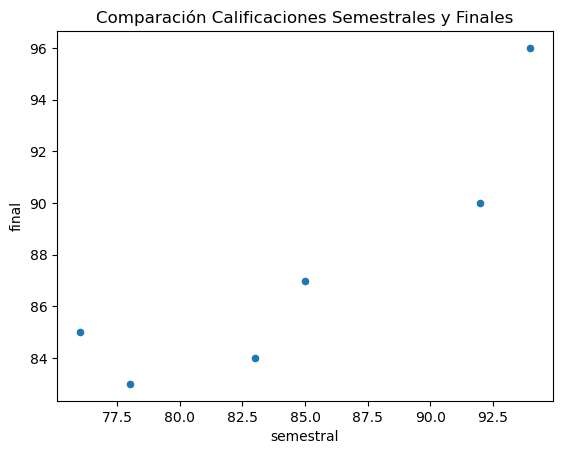

In [69]:
import matplotlib.pyplot as plt
boleta.plot.scatter(x='semestral', y='final')
plt.title("Comparación Calificaciones Semestrales y Finales")

Imagina que has realizado algo de limpieza de datos y estás listo para guardar tu trabajo. Una buena práctica sería guardar tu DataFrame en un archivo csv, lo cual es fácil de hacer con el método `to_csv()`.

In [71]:
boleta.to_csv("boletas.csv")

## <a style="padding:3px;color: #FF4D4D; "><strong>Indexación de Series</strong></a>

Hablemos de las herramientas que tenemos para extraer filas, columnas o valores individuales de los objetos de Pandas. 

Esto es un poco más complicado que en otros casos que hemos visto. 

Gran parte de la complicación viene de soportar tanto las posiciones enteras como las etiquetas de Índice.

Empecemos con el caso de las Series.

In [74]:
premios = pd.Series( [x*2 for x in range(5)],
                    index = ['cachorro{}'.format(x) for x in range(5)])
premios

cachorro0    0
cachorro1    2
cachorro2    4
cachorro3    6
cachorro4    8
dtype: int64

En estas podemos colocar tanto una posición entera como una etiqueta dentro de los corchetes.

In [75]:
premios[1]

C:\Users\emanu\AppData\Local\Temp\ipykernel_11948\2937382157.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  premios[1]


2

In [76]:
premios['cachorro1']

2

Pueden ponerse varias etiquetas o posiciones en una secuencia.

In [78]:
premios[['cachorro1','cachorro4']]

cachorro1    2
cachorro4    8
dtype: int64

Podemos usar una selección booleana, de manera similar a NumPy.

In [80]:
premios > 3

cachorro0    False
cachorro1    False
cachorro2     True
cachorro3     True
cachorro4     True
dtype: bool

In [81]:
premios[premios > 3]

cachorro2    4
cachorro3    6
cachorro4    8
dtype: int64

Podemos usar un slice tanto con posiciones enteras como con etiquetas.

In [83]:
premios[1:3]

cachorro1    2
cachorro2    4
dtype: int64

In [84]:
premios['cachorro1':'cachorro3']

cachorro1    2
cachorro2    4
cachorro3    6
dtype: int64

***IMPORTANTE:*** Estos dos slice **no se comportan de la misma manera**. Al usar etiquetas, Pandas rompe con la convención estándar de Python (afortunada o desafortunadamente) e incluye el dato final. Hay que tener esto en cuenta, porque es fácil seleccionar una fila adicional por error.

## <a style="padding:3px;color: #FF4D4D; "><strong>Indexación de DataFrames</strong></a>

Ahora intentemos indexar con un DataFrame.

In [88]:
Cachorros = pd.DataFrame( np.random.geometric(.2, size = (5,5)) , 
             columns = ['truco{}'.format(x) for x in range(5)],
             index = ['cachorro{}'.format(x) for x in range(5)])
Cachorros

,truco0,truco1,truco2,truco3,truco4
cachorro0,3,7,1,2,11
cachorro1,3,18,10,20,12
cachorro2,2,9,1,7,2
cachorro3,1,13,8,4,10
cachorro4,4,3,6,3,5


Cuando se coloca un solo argumento entre corchetes, Pandas seleccionará las columnas del DataFrame.

In [90]:
Cachorros['truco1']

cachorro0     7
cachorro1    18
cachorro2     9
cachorro3    13
cachorro4     3
Name: truco1, dtype: int32

Y si evitamos espacios y caracteres reservados en los nombres de columnas, hay una forma más agradable de escribir esto.

In [92]:
Cachorros.truco1

cachorro0     7
cachorro1    18
cachorro2     9
cachorro3    13
cachorro4     3
Name: truco1, dtype: int32

Pueden extraerse varias columnas con una lista.

In [94]:
Cachorros[['truco1','truco4']]

,truco1,truco4
cachorro0,7,11
cachorro1,18,12
cachorro2,9,2
cachorro3,13,10
cachorro4,3,5


En algunos casos la indexación de DataFrames funciona de manera diferente. 

Por ejemplo, al pasar un arreglo booleano, se usará para filtrar filas, no columnas.

In [96]:
Cachorros.truco1 > 3

cachorro0     True
cachorro1     True
cachorro2     True
cachorro3     True
cachorro4    False
Name: truco1, dtype: bool

In [97]:
Cachorros[Cachorros.truco1 > 3]

,truco0,truco1,truco2,truco3,truco4
cachorro0,3,7,1,2,11
cachorro1,3,18,10,20,12
cachorro2,2,9,1,7,2
cachorro3,1,13,8,4,10


Esto es un poco inesperado, pero filtrar filas es una operación tan común que los desarrolladores de Pandas querían que fuera posible hacerlo en pocos pasos.

Esto es más raro, pero podemos pasar un DataFrame booleano para indexar. 

Esto es principalmente útil si queremos establecer valores en todo el DataFrame basados en una condición.

Como ejemplo, supongamos que necesitamos restringir los datos superiores a 15, estableciéndolos en 15.

In [99]:
Cachorros > 15

,truco0,truco1,truco2,truco3,truco4
cachorro0,False,False,False,False,False
cachorro1,False,True,False,True,False
cachorro2,False,False,False,False,False
cachorro3,False,False,False,False,False
cachorro4,False,False,False,False,False


In [100]:
Cachorros[Cachorros > 15] = 15
Cachorros

,truco0,truco1,truco2,truco3,truco4
cachorro0,3,7,1,2,11
cachorro1,3,15,10,15,12
cachorro2,2,9,1,7,2
cachorro3,1,13,8,4,10
cachorro4,4,3,6,3,5


Otro caso especial es que los slices se aplican a las filas.

In [102]:
Cachorros[0:2]

,truco0,truco1,truco2,truco3,truco4
cachorro0,3,7,1,2,11
cachorro1,3,15,10,15,12


In [103]:
Cachorros['cachorro0':'cachorro2']

,truco0,truco1,truco2,truco3,truco4
cachorro0,3,7,1,2,11
cachorro1,3,15,10,15,12
cachorro2,2,9,1,7,2


Esta es una operación contraintuitiva con base en lo que estuvimos revisando, pero es bueno saber que existe la excepción.

Y cabe mencionar que nuevamente tenemos un comportamiento distinto cuando utilizamos índices que cuando utilizamos etiquetas.

## <a style="padding:3px;color: #FF4D4D; "><strong>loc & iloc</strong></a>

Hemos visto algunos ejemplos de indexación, pero realmente no hemos abordado el problema central: La forma adecuada de seleccionar filas y columnas de un DataFrame.

El método `ix`, ahora obsoleto, fue uno de los primeros indexadores de Pandas. Desafortunadamente, `ix` solía confundir a las personas, porque era difícil predecir si indexaría por posición o por etiqueta. Esto es especialmente cierto si tenemos un índice de etiquetas que son números enteros.

En su lugar, es importante que recordemos dos métodos de indexación:

- `loc` siempre usa etiquetas para indexar.

- `iloc` siempre usa la posición (int).

Utilizando nuestro DataFrame de antes:

In [107]:
Cachorros

,truco0,truco1,truco2,truco3,truco4
cachorro0,3,7,1,2,11
cachorro1,3,15,10,15,12
cachorro2,2,9,1,7,2
cachorro3,1,13,8,4,10
cachorro4,4,3,6,3,5


Supongamos que queremos extraer el valor del medio (que es 1). Podemos hacerlo de dos maneras.

In [109]:
Cachorros.loc['cachorro2', 'truco2']

1

In [110]:
Cachorros.iloc[2,2]

1

Notemos que, de cualquier manera, el formato es filas, luego una coma, y luego columnas.

Podemos extraer múltiples valores proporcionando listas, slices o Series booleanas, ya sea a las filas o a las columnas.

In [112]:
Cachorros.loc[['cachorro2','cachorro4'], 'truco2']

cachorro2    1
cachorro4    6
Name: truco2, dtype: int32

In [113]:
Cachorros.loc['cachorro2', 'truco1':'truco3']

truco1    9
truco2    1
truco3    7
Name: cachorro2, dtype: int32

In [114]:
Cachorros.iloc[1:3,1:3]

,truco1,truco2
cachorro1,15,10
cachorro2,9,1


In [115]:
Cachorros.loc[Cachorros.truco1 > 7,'truco3':'truco4']

,truco3,truco4
cachorro1,15,12
cachorro2,7,2
cachorro3,4,10


In [116]:
Cachorros.iloc[:4,:]

,truco0,truco1,truco2,truco3,truco4
cachorro0,3,7,1,2,11
cachorro1,3,15,10,15,12
cachorro2,2,9,1,7,2
cachorro3,1,13,8,4,10


In [117]:
Cachorros.iloc[:4,:][Cachorros.truco0 > 2]

C:\Users\emanu\AppData\Local\Temp\ipykernel_11948\585209911.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Cachorros.iloc[:4,:][Cachorros.truco0 > 2]


,truco0,truco1,truco2,truco3,truco4
cachorro0,3,7,1,2,11
cachorro1,3,15,10,15,12


Aquí hay una situación complicada sobre la que quizás nos hemos preguntado.

In [119]:
s = pd.Series(range(5), index = range(5,0,-1) )
s

5    0
4    1
3    2
2    3
1    4
dtype: int64

Tenemos una Series con un índice entero, pero es diferente de las posiciones enteras. ¿Qué pasaría si escribimos `s[1]`? ¿Debería Pandas interpretarlo como una etiqueta o como una posición?

In [121]:
s[1]

4

Podemos ver que trata al número como una etiqueta. Desafortunadamente, para hacerlo aún más confuso, un slice se interpreta como posiciones.

In [123]:
s[1:3]

4    1
3    2
dtype: int64

Podemos intentar memorizar todas las reglas, pero una buena práctica es siempre especificar exactamente lo que queremos escribiendo `loc` o `iloc`.

In [125]:
s.loc[3:1]

3    2
2    3
1    4
dtype: int64

El mismo consejo aplica cuando tenemos un índice entero en un DataFrame. Es bueno adoptar mejores prácticas y evitar confusiones desde el inicio de ser posible

## <a style="padding:3px;color: #FF4D4D; "><strong>Aplicando Funciones a DataFrames</strong></a>

Anteriormente, almacenamos nuestros datos de calificaciones como un archivo CSV. Recuperémoslo con el método `read_csv()` de Pandas.

In [129]:
boletas = pd.read_csv('boletas.csv')
boletas

,estudiante,semestral,final
0,Mario,76,85
1,Alejandro,92,90
2,Javier,85,87
3,Luciana,78,83
4,Sabrina,94,96
5,Beatriz,83,84


Notemos que ya no tenemos los nombres de los estudiantes como nuestro índice. Esto es porque no hay forma de especificar qué variable es un índice en un archivo CSV, por lo que esa información se pierde. Podemos volver a la forma en que teníamos las cosas antes con `set_index()`.

In [131]:
boletas = boletas.set_index('estudiante')
boletas

,semestral,final
estudiante,,
Mario,76,85
Alejandro,92,90
Javier,85,87
Luciana,78,83
Sabrina,94,96
Beatriz,83,84


También agreguemos algunos valores faltantes, solo para hacer las cosas más interesantes.

In [133]:
boletas.loc['Mario','final'] = np.nan
boletas.loc['Beatriz','semestral'] = np.nan
boletas

,semestral,final
estudiante,,
Mario,76.0,NaN
Alejandro,92.0,90.0
Javier,85.0,87.0
Luciana,78.0,83.0
Sabrina,94.0,96.0
Beatriz,NaN,84.0


Es hora de aplicar algunas funciones. Por ejemplo, encontrar el puntaje promedio para cada tipo examen

In [135]:
boletas.mean()

semestral    85.0
final        88.0
dtype: float64

Notemos que Pandas, a diferencia de NumPy, asume que queremos ignorar los valores faltantes, es decir, dejarlos fuera para que el cálculo pueda continuar.

Esto es usualmente lo que queremos, pero existe el riesgo de que no pensemos en nuestros valores faltantes porque Pandas no nos obliga a hacerlo. 

¿Y si los valores faltantes representan a estudiantes que se rezagaron en el curso? ¿Siguen siendo las medias una medida justa de desempeño de los estudiantes?

Podemos anular este comportamiento si lo deseamos con `skipna`.

In [137]:
boletas.mean(skipna = False)

semestral   NaN
final       NaN
dtype: float64

Por default, `mean` opera "a lo largo de las filas", lo que llamamos `axis 0`. 

Esto debería tener sentido para la mayoría de los DataFrames, pues las columnas podrían representar cosas completamente distintas.

Aunque también es posible calcular la media horizontalmente ("a lo largo de las columnas"). Solo tenemos que establecer `axis = 1`.

In [139]:
boletas.mean(axis = 1)

estudiante
Mario        76.0
Alejandro    91.0
Javier       86.0
Luciana      80.5
Sabrina      95.0
Beatriz      84.0
dtype: float64

In [140]:
boletas.mean(skipna = False, axis = 1)

estudiante
Mario         NaN
Alejandro    91.0
Javier       86.0
Luciana      80.5
Sabrina      95.0
Beatriz       NaN
dtype: float64

Notemos que el método `mean()` devuelve una Series.

In [142]:
prom = boletas.mean()
type(prom)

pandas.core.series.Series

In [143]:
prom

semestral    85.0
final        88.0
dtype: float64

Podemos restar esta Series del DataFrame, para encontrar las diferencias por encima o debajo del promedio de calificaciones, tanto semestral como final.

In [145]:
boletas - prom

,semestral,final
estudiante,,
Mario,-9.0,NaN
Alejandro,7.0,2.0
Javier,0.0,-1.0
Luciana,-7.0,-5.0
Sabrina,9.0,8.0
Beatriz,NaN,-4.0


Notemos que la Series se empareja con las columnas.

Además, la Series se transmite, al igual que en NumPy. 

Aquí estamos tratando de restar una Series de `1 x 2` de un DataFrame de `6 x 2`. 

La Series se copia 6 veces automáticamente para que las dimensiones se alineen.

Los DataFrames tienen muchos otros métodos para calcular estadísticas para las columnas (o filas).

In [147]:
boletas.sum()

semestral    425.0
final        440.0
dtype: float64

In [148]:
boletas.min()

semestral    76.0
final        83.0
dtype: float64

In [149]:
boletas.std()

semestral    8.062258
final        5.244044
dtype: float64

Podemos usar los métodos `corr()` y `cov()` para obtener una matriz completa de correlación o covarianza, respectivamente.

In [151]:
boletas.cov()

,semestral,final
semestral,65.000000,37.333333
final,37.333333,27.500000


In [152]:
boletas.corr()

,semestral,final
semestral,1.000000,0.937001
final,0.937001,1.000000


Si tenemos demasiadas variables, calcular la matriz completa puede ser demasiada información. También podemos obtener la correlación de cada columna con una Series específica usando el método `corrwith()`.

In [154]:
boletas.corrwith(boletas.mean(axis=1))

semestral    0.987462
final        0.975852
dtype: float64

## <a style="padding:3px;color: #FF4D4D; "><strong>Funciones Personalizadas</strong></a>

Con bastante frecuencia, querremos aplicar nuestra propia función personalizada a las columnas y filas de un DataFrame. Podemos hacer esto con el método general (y muy importante) `apply()`.

In [157]:
rangoCalifs = lambda x: x.max() - x.min()

In [158]:
boletas.apply(rangoCalifs)

semestral    18.0
final        13.0
dtype: float64

Podemos aplicar nuestra función ya sea a lo largo de las filas o a lo largo de las columnas.

In [160]:
boletas.apply(rangoCalifs, axis = 1)

estudiante
Mario        0.0
Alejandro    2.0
Javier       2.0
Luciana      5.0
Sabrina      2.0
Beatriz      0.0
dtype: float64

A veces veremos que las personas usan el método `agg` en estas situaciones. Agg es la abreviatura de aggregate, y esto enfatiza principalmente que estamos perdiendo una dimensión.

In [162]:
boletas.agg(rangoCalifs)

semestral    18.0
final        13.0
dtype: float64

También es posible aplicar una función que devuelva un DataFrame completo. En este caso, no perderíamos una dimensión en el resultado (y no podríamos usar agg).

In [164]:
def califMinMax(x):
    return pd.Series([x.min(),x.max()], index = ['min','max'])

In [3]:
califMinMax

NameError: name 'califMinMax' is not defined

Esto es menos común, pero debemos saber que podemos aplicar una función a cada elemento de un DataFrame. Esto se hace con la función `map()`.

In [167]:
boletas.map(lambda x: x+1)

,semestral,final
estudiante,,
Mario,77.0,NaN
Alejandro,93.0,91.0
Javier,86.0,88.0
Luciana,79.0,84.0
Sabrina,95.0,97.0
Beatriz,NaN,85.0


## <a style="padding:3px;color: #FF4D4D; "><strong>Métodos para conocer nuestras Variables</strong></a>

Veamos un método realmente útil para cuando estamos intentando hacer una exploración básica de los datos. `describe()` nos proporciona algunas estadísticas comunes, y es un excelente punto de partida cuando estamos comenzando a explorar un conjunto de datos.

In [170]:
boletas.describe()

,semestral,final
count,5.000000,5.000000
mean,85.000000,88.000000
std,8.062258,5.244044
min,76.000000,83.000000
25%,78.000000,84.000000
50%,85.000000,87.000000
75%,92.000000,90.000000
max,94.000000,96.000000


`describe()` se comporta de manera diferente, dependiendo del tipo de variable. Por ejemplo, vamos a agregar una variable para una calificación en letras.

In [172]:
boletas.mean(axis=1)

estudiante
Mario        76.0
Alejandro    91.0
Javier       86.0
Luciana      80.5
Sabrina      95.0
Beatriz      84.0
dtype: float64

In [173]:
pd.cut(boletas.mean(axis=1), (0,70,80,90,100), labels = ('F','C','B','A'))

estudiante
Mario        C
Alejandro    A
Javier       B
Luciana      B
Sabrina      A
Beatriz      B
dtype: category
Categories (4, object): ['F' < 'C' < 'B' < 'A']

In [174]:
boletas['letraCalif'] = pd.cut(boletas.mean(axis=1), (0,70,80,90,100), labels = ('F','C','B','A'))

In [175]:
boletas

,semestral,final,letraCalif
estudiante,,,
Mario,76.0,NaN,C
Alejandro,92.0,90.0,A
Javier,85.0,87.0,B
Luciana,78.0,83.0,B
Sabrina,94.0,96.0,A
Beatriz,NaN,84.0,B


In [176]:
boletas.letraCalif.describe()

count     6
unique    3
top       B
freq      3
Name: letraCalif, dtype: object

Un método aún más importante es value_counts(). Este nos devuelve una Series que nos indica con qué frecuencia ocurre cada valor en una variable.

In [178]:
boletas.letraCalif.value_counts()

letraCalif
B    3
A    2
C    1
F    0
Name: count, dtype: int64

Guardemos nuestro trabajo para poder usarlo más tarde.

In [180]:
boletas.to_csv('boletas_letras.csv')

## <a style="padding:3px;color: #FF4D4D; "><strong>Métodos para conocer nuestras Variables</strong></a>

Vale la pena dedicar un momento a hablar sobre cómo ordenar DataFrames. Vamos a cargar nuestro DataFrame de calificaciones.

Con el método `index_col = 0` podemos indicarle a nuestro DataFrame que la columna 0 del archivo CSV realmente corresponde a nuestro índice.

In [183]:
boletas = pd.read_csv('boletas_letras.csv', index_col=0)
boletas

,semestral,final,letraCalif
estudiante,,,
Mario,76.0,NaN,C
Alejandro,92.0,90.0,A
Javier,85.0,87.0,B
Luciana,78.0,83.0,B
Sabrina,94.0,96.0,A
Beatriz,NaN,84.0,B


Hay dos métodos que debemos tener en cuenta. Primero, `sort_index()`.

In [185]:
boletas.sort_index()

,semestral,final,letraCalif
estudiante,,,
Alejandro,92.0,90.0,A
Beatriz,NaN,84.0,B
Javier,85.0,87.0,B
Luciana,78.0,83.0,B
Mario,76.0,NaN,C
Sabrina,94.0,96.0,A


Nótese que este método devuelve un DataFrame ordenado nuevo. Para conservar los cambios, podríamos sobrescribir nuestra variable gradebook.

El otro método principal de ordenación es `sort_values()`. Para usar este método, necesitamos especificar una columna sobre la que ordenar.

In [187]:
boletas.sort_values('semestral')

,semestral,final,letraCalif
estudiante,,,
Mario,76.0,NaN,C
Luciana,78.0,83.0,B
Javier,85.0,87.0,B
Alejandro,92.0,90.0,A
Sabrina,94.0,96.0,A
Beatriz,NaN,84.0,B


Nótese que los valores faltantes `NaN` se mueven al final. Tal vez queramos invertir el orden para colocar las calificaciones más altas en la parte superior.

In [189]:
boletas.sort_values('semestral', ascending= False)

,semestral,final,letraCalif
estudiante,,,
Sabrina,94.0,96.0,A
Alejandro,92.0,90.0,A
Javier,85.0,87.0,B
Luciana,78.0,83.0,B
Mario,76.0,NaN,C
Beatriz,NaN,84.0,B


In [190]:
boletas.sort_values('letraCalif')

,semestral,final,letraCalif
estudiante,,,
Alejandro,92.0,90.0,A
Sabrina,94.0,96.0,A
Javier,85.0,87.0,B
Luciana,78.0,83.0,B
Beatriz,NaN,84.0,B
Mario,76.0,NaN,C


También podemos pasar una lista para ordenar por múltiples variables.

In [192]:
boletas.sort_values(['letraCalif','final'], ascending = [True, False])

,semestral,final,letraCalif
estudiante,,,
Sabrina,94.0,96.0,A
Alejandro,92.0,90.0,A
Javier,85.0,87.0,B
Beatriz,NaN,84.0,B
Luciana,78.0,83.0,B
Mario,76.0,NaN,C
